# CE888 Assignment 2 for Demo

This code is written to demonstarte a classifier using an autoencoder for ce888 assignment 2.

**Author**          : Tomoko Ayakawa<br> 
**Created on**      : 29 March 2019<br> 
**Last modified on**: 22 April 2019<br> 

In [1]:
# import open source libraries
import numpy as np
import sys, keras

# import original libraries
sys.path.append("../")
sys.path.append("./sub")

from conf import myVariables as VAR
import load_data as DATA
import preprocess as PREP
import autoencoder as AE
import mlp as MLP
import grid_search as GS
import comparison as CMP

# Automatically reload changed modules before executing each line
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


## 1. Prepare the data
### 1-1. Select the data to load

In [2]:
data_list=None
ok=False
while ok==False:
    data_list={0: "human activity", 1: "spam", 2: "phishing"}
    try:
        data_id=int(input(data_list))
        ok=True
    except:
        continue

col_names, features_df, targets_df, data_df, timestamp=DATA.load_data(data_id=data_id)
unique_labels=DATA.verify_data(data_df, targets_df, dispaly_range=False)

{0: 'human activity', 1: 'spam', 2: 'phishing'}
{0: 'human activity', 1: 'spam', 2: 'phishing'}1
Number of NaN: 0
Data shape:  (4601, 58)
Target labels: [0 1]
Class distribution: ['0.61', '0.39']


./sub\load_spam.py:66: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  data_df = data_df.convert_objects(convert_numeric=True)


## 1-2. Obtain small data

In [3]:
features, classes=PREP.get_small_data(features_df, targets_df)
pic_file=timestamp+"(%d)" % len(features)

Enter the number of samples to use (Total: 4601): 1000
 - Number of features: 57
 - Minimul data size : 506
 - Specified size    : 1000



### 1-3. Pre-process the data
Fit the scaler and transform the data.<br>
When the scaler ID is not specified, MinMaxScaler will be applied.

In [4]:
scl, features_nrm=PREP.pre_processing(features, display_result=False)

Select the scaler 0 (None), 1 (MinMax), 2 (Quantile), 3 (Standard): 1
Scaler: MinMaxScaler(copy=True, feature_range=(0, 1))


### 1-4. Split the data

In [5]:
X, y=features_nrm, classes
X_tr, X_te, y_tr, y_te=PREP.split_data(features_nrm, classes)

Enter the test_size (0<=test_size<1): 
Training: 800, Test: 200



## 4. Build an Autoencoder
### 4-1. Define the parameters

In [22]:
ae_layers, mode, act, opt, loss, dropout, \
    epochs, verbose, summary_display=AE.get_parameters(data_id)
pic_file=timestamp+"(%d_%.1f)" % (len(features), dropout)

Define 9 parameters for the autoencoder.
When skipped (push enter) or an invalid value is given, the default value will be used.
[Parameter 1/9: Autoencoder type] 0:Basic or 1:Stacked (default=1): 
[Parameter 2/9: Number of neurons in each layer] Integers separated by comma (default=50,40,30,20,10): 
[Parameter 3/9: Activation function] 0:relu 1:sigmoid 2:tanh 3:softmax (default=relu): 
[Parameter 4/9: Optimiser] 0:adam 1:sdg (default=adam): 
 - Learning rate (default=0.001000): 
[Parameter 5/9: Loss function] 0:mse 1:mean_absolute_error 2:mean_squared_logarithmic_error 3:categorical_crossentropy (default=mse): 
[Parameter 6/9: Dropout rate] 0<=rate<1 (default=0.000000): 0.2
[Parameter 7/9: Training epochs] (default=100): 
[Parameter 8/9: Verbose] 0:False or 1:True (default=0): 
[Parameter 9/9: Summary display] 0:False or 1:True (default=0): 

Parameters for the autoencoder are
 1. Mode: 1(Stacked)
 2. Layers: [50, 40, 30, 20, 10]
 3. Activation function: relu
 4. Optimiser: <keras.opt

### 4-2. Train the autoencoder

In [23]:
encoder, histories=AE.autoencoder(X, layers=ae_layers, mode=mode, act=act, opt=opt, 
                   loss=loss, dropout=dropout, epochs=epochs, verbose=verbose, 
                   summary_display=summary_display)

Training Layer 1/5 ...
Training Layer 2/5 ...
Training Layer 3/5 ...
Training Layer 4/5 ...
Training Layer 5/5 ...


### 4-3. Display the training loss history

Save training loss history as a picture? (y/n): y


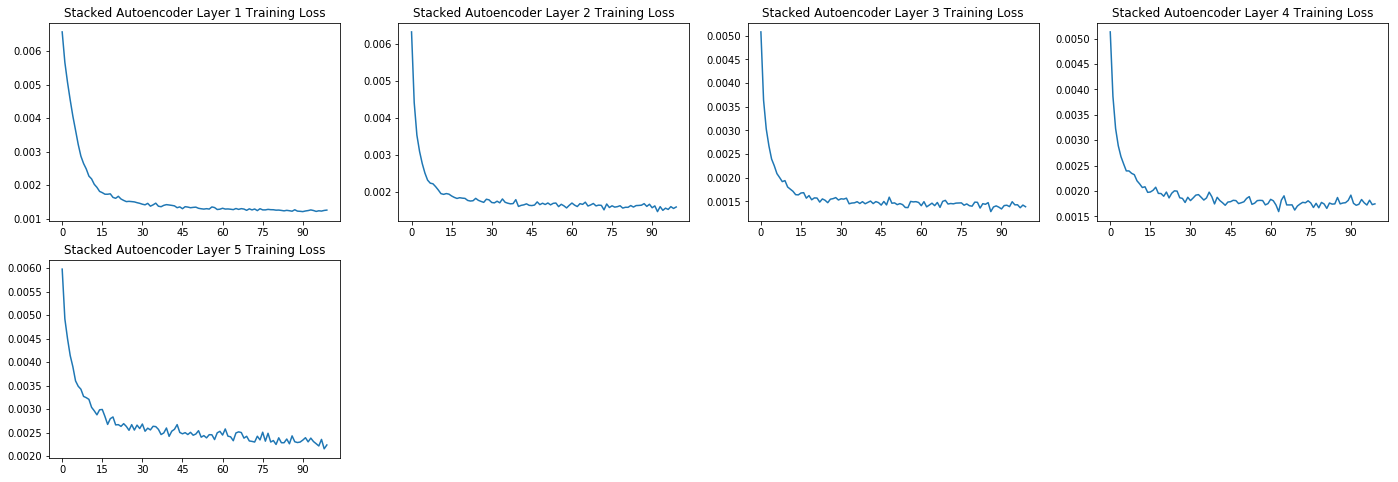

In [24]:
%matplotlib inline
AE.plot_ae_loss_history(histories, mode, pic_file)

### 4-4. Extract features from the datasets

In [25]:
X_all_cmp=encoder.predict(X)
X_tr_cmp=encoder.predict(X_tr)
X_te_cmp=encoder.predict(X_te)

print("The number of compressed features:", len(X_all_cmp[0]))

The number of compressed features: 10


## 5. Build a discriminative neural network

### 5-1. Grid Search for optimal parameter
#### (1) Define the parameters

In [26]:
#act, h_num, max_itr, lr, solver, splits=GS.get_parameters()

#### (2) Grid Search

In [27]:
#param_grid, clf=GS.parameter_grid(activation=act, \
#                    hidden_layer_sizes=(h_num,), max_iter=max_itr, \
#                    learning_rate_init=lr, solver=solver)
#if param_grid!=1: GS.grid_search(X_all_cmp, y, clf, param_grid, grid_splits=splits)

### 5-2. Define the parameters for MLP

In [28]:
finetune, h_num, h_act, out_act, opt, loss, epochs, val_rate, \
    verbose, summary_display=MLP.get_parameters()

Define 10 parameters for the autoencoder.
When skipped (push enter) or an invalid value is given, the default value will be used.
[Parameter 1/10: Finetune autoencoder] 0:False or 1:True (default=0): 
[Parameter 2/10: Number of hidden neurons](default=25): 
[Parameter 3/10: Activation function (hidden layer)] 0:relu 1:sigmoid 2:tanh 3:softmax (default=relu): 
[Parameter 4/10: Activation function (output layer)] 0:relu 1:sigmoid 2:tanh 3:softmax (default=softmax): 
[Parameter 5/10: Optimiser] 0:adam 1:sdg (default=adam): 
 - Learning rate (default=0.010000): 
[Parameter 6/10: Loss function] 0:mse 1:mean_absolute_error 2:mean_squared_logarithmic_error 3:categorical_crossentropy (default=categorical_crossentropy): 
[Parameter 7/10: Training epochs] (default=100): 
[Parameter 8/10: Validation] 0<rate<1 (default=0.200000): 
[Parameter 9/10: Verbose] 0:False or 1:True (default=0): 
[Parameter 10/10: Summary display] 0:False or 1:True (default=1): 

Parameters for the MLP are
 1. Finetune: : 

In [29]:
if data_id==0: epochs=100
if data_id==1: epochs=250
if data_id==2: epochs=40
epochs

250

### 5-3. Train the MLP

In [30]:
model=MLP.build_mlp(encoder, num_in=ae_layers[-1], num_out=len(unique_labels), \
            finetune=finetune, h_num=h_num, h_act=h_act, \
            out_act=out_act, opt=opt, loss=loss, \
            summary_display=summary_display)
histories=MLP.train_mlp(X, y, model, epochs=epochs, \
            val_rate=val_rate, verbose=verbose)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 10)                7000      
_________________________________________________________________
dense_23 (Dense)             (None, 25)                275       
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 52        
Total params: 7,327
Trainable params: 327
Non-trainable params: 7,000
_________________________________________________________________
None


### 5-4. Display the training loss history

Save training loss history as a picture? (y/n): y


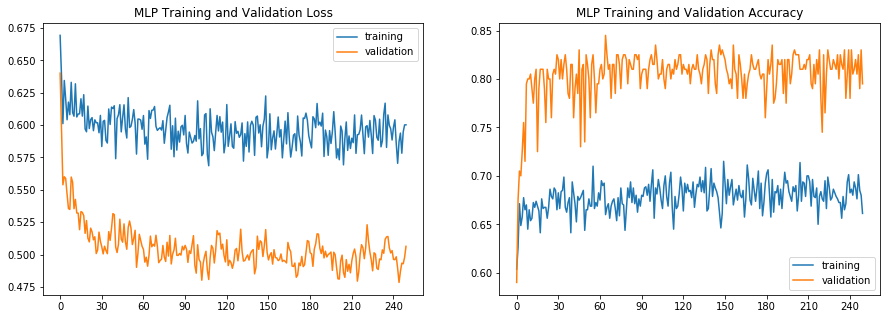

In [31]:
MLP.plot_mlp_loss_history(histories, pic_file)

In [32]:
#loss=histories.history["val_loss"]
#m=100
#m_idx=0
#for i in range(1, len(loss)):
#    now, prev=loss[i], loss[i-1]
#    if now<=m:
#        m=now
#        print("Epoch %3d: updated minimum loss %f" % (i, now))

## 6. Evaluation
### 6-1. Cross Validation

In [33]:
accs, fscores=MLP.cross_validation(model, X, y, unique_labels, epochs=epochs)

[Parameter 1/1: Number of cross validation folds] (default=10): n
Evaluation metrics (95% confidence interval)
  Accuracy: 0.79 (+/- 0.08)
  F-score : 0.79 (+/- 0.09)


### 6-2. Train, predict and evaluate the classifier

Train with 800 samples, Test with 200 samples
             Accuracy  Wighted F-1
Autoencoder      0.88     0.878542
Save a confusion matrix as a picture? (y/n): n


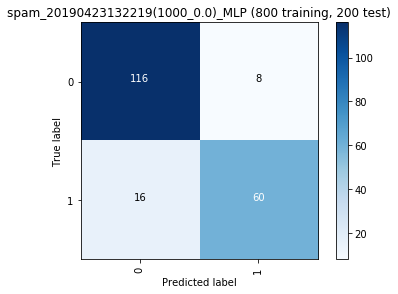

             precision    recall  f1-score   support

          0       0.88      0.94      0.91       124
          1       0.88      0.79      0.83        76

avg / total       0.88      0.88      0.88       200



In [18]:
%matplotlib inline
pred=MLP.evaluation(model, X_tr, y_tr, X_te, y_te, unique_labels, pic_file)

# ===========================================================

## 7. Comparison with other thechniques
### 7-1. Performance comparison with DT, NB, SVM, NN

In [19]:
%matplotlib inline
CMP.performance_comparison(pred, X_tr, X_te, y_tr, y_te, \
                           timestamp+"(%d)" % len(features), data_id)

Display confusion matrix? (y/n): n
                Accuracy  Wighted F-1
Autoencoder        0.880     0.878542
Decision Tree      0.920     0.919554
Naive Bayes        0.805     0.807228
SVM                0.675     0.592890
Neural Network     0.910     0.909498


### 7-2. Plot 3 dimensions obtained by PCA and Autoencoder

In [20]:
# if the compressed features have more than three dimensions, retrain the autoencoder
if ae_layers[-1]!=3:
    if input("Retrain the autoencoder? (y/n): ")=="y":
        ae_layers.append(5)
        ae_layers.append(3)
        re_encoder, histories=AE.autoencoder(X, layers=ae_layers, mode=mode, act=act, 
                           opt=opt, loss=loss, dropout=dropout, epochs=epochs, 
                           verbose=verbose, summary_display=summary_display)
        X_all_cmp=re_encoder.predict(X)

        print("The number of compressed features:", len(X_all_cmp[0]))

Retrain the autoencoder? (y/n): n


In [21]:
%matplotlib inline
if ae_layers[-1]==3: CMP.plot_3D(X, X_all_cmp, y)

# ===== End of the code =====